<a href="https://colab.research.google.com/github/adarsh2350/SMS_Spam_detector/blob/main/sms_spam_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from wordcloud import WordCloud

In [6]:

df = pd.read_csv('/content/spam.csv')
df.shape

(5572, 2)

In [7]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Checking for null values

In [8]:
df.isnull().sum()

label      0
message    0
dtype: int64

## Data Cleaning and Preprocessing

In [9]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [10]:
def processing(sent):
  lm = WordNetLemmatizer()
  # tokenization
  sent = re.sub('[^a-zA-Z0-9]',' ',sent)
  sent = sent.lower()
  review = sent.split()
  clean_words = []

  for word in review:
    # stopwords
    if word not in stopwords.words('english'):
      # stemming
      word = lm.lemmatize(word)
      clean_words.append(word)

  sent = ' '.join(clean_words)

  return sent

### Text pre-processing

In [11]:
for index, rows in df.iterrows():
  sent = df.loc[index,'message']
  sent = processing(sent)
  df.loc[index,'cleaned_messages'] = sent

In [12]:
df.head()

,label,message,cleaned_messages
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though


In [13]:
for index, rows in df.iterrows():
  if rows['label'] == 'ham':
    rows['label'] = 0
  else:
    rows['label'] = 1

In [14]:
df.head()

,label,message,cleaned_messages
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though


In [15]:
df.drop(columns=['message'],inplace=True)

In [16]:
df['label'].value_counts()

0    4825
1     747
Name: label, dtype: int64

Frequency of messages of different lengths

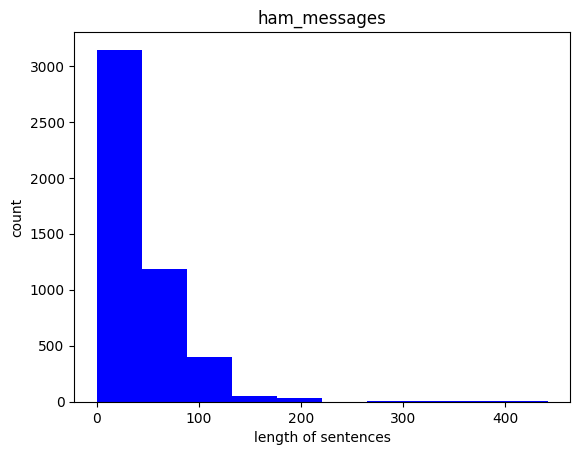

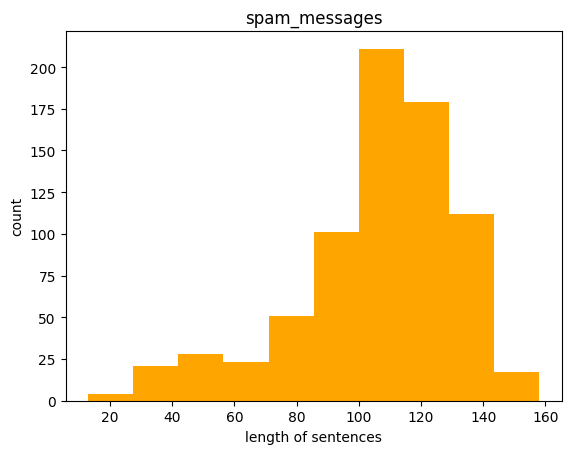

In [17]:
length_of_ham_sentences = df['cleaned_messages'][df['label']==0].str.len()
length_of_spam_sentences = df['cleaned_messages'][df['label']==1].str.len()

plt.hist(length_of_ham_sentences, color='blue')
plt.title('ham_messages')
plt.xlabel('length of sentences')
plt.ylabel('count')
plt.show()

plt.hist(length_of_spam_sentences, color='orange')
plt.title('spam_messages')
plt.xlabel('length of sentences')
plt.ylabel('count')
plt.show()

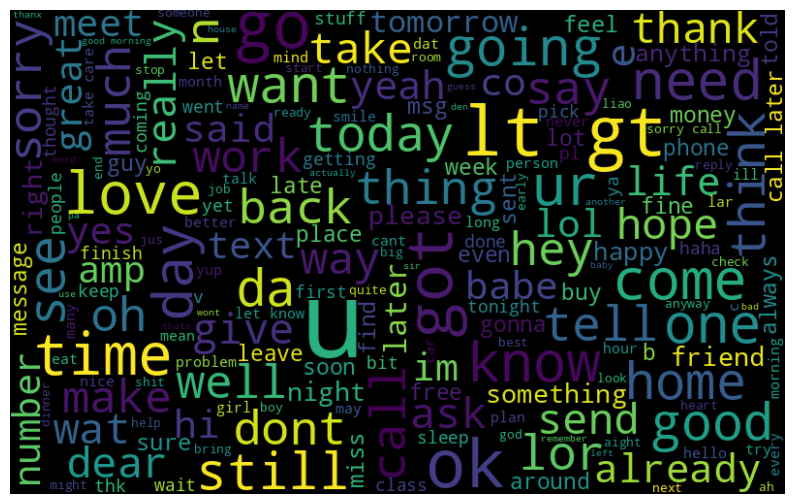

In [18]:
# ham cloud
ham_words =' '.join([text for text in df['cleaned_messages'][df['label'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(ham_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

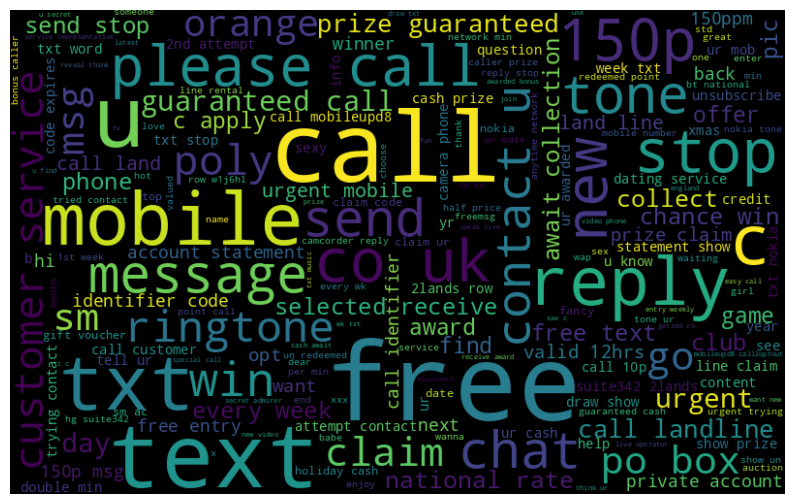

In [19]:
# spam cloud
spam_words =' '.join([text for text in df['cleaned_messages'][df['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(spam_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Word-embedding

In [20]:
corpus = list(df['cleaned_messages'])
# corpus

## BOW technique

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
cv = CountVectorizer(binary=True,ngram_range=(1,2))
X = cv.fit_transform(corpus)

In [23]:
# cv.vocabulary_

In [24]:
X

<5572x38986 sparse matrix of type '<class 'numpy.int64'>'
	with 90154 stored elements in Compressed Sparse Row format>

In [25]:
X[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [26]:
y = list(df['label'])

### Modelling

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [28]:
rf = RandomForestClassifier()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [30]:
print(X_train.shape, X_test.shape)

(4457, 38986) (1115, 38986)


In [31]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

### Accuracy

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       987
           1       0.77      1.00      0.87       128

    accuracy                           0.97      1115
   macro avg       0.89      0.98      0.93      1115
weighted avg       0.97      0.97      0.97      1115



## TF-IDF

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
tv = TfidfVectorizer(ngram_range=(1,3))
X = tv.fit_transform(corpus)

In [35]:
# tv.vocabulary_

In [36]:
X

<5572x69858 sparse matrix of type '<class 'numpy.float64'>'
	with 128313 stored elements in Compressed Sparse Row format>

In [37]:
X[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [38]:
y = list(df['label'])

### Modelling

In [39]:
rf = RandomForestClassifier()

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [41]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

### Accuracy

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       995
           1       0.72      1.00      0.84       120

    accuracy                           0.96      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.97      0.96      0.96      1115



## Word2Vec (Transfer Learning)

In [43]:
# !pip install gensim

In [44]:
import gensim.downloader as api

In [45]:
# downloading pre-trained w2v model on google news data
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


Functionalities provided by pre-trained model

In [46]:
# word vector access
print(wv['king'])

[ 1.25976562e-01  2.97851562e-02  8.60595703e-03  1.39648438e-01
 -2.56347656e-02 -3.61328125e-02  1.11816406e-01 -1.98242188e-01
  5.12695312e-02  3.63281250e-01 -2.42187500e-01 -3.02734375e-01
 -1.77734375e-01 -2.49023438e-02 -1.67968750e-01 -1.69921875e-01
  3.46679688e-02  5.21850586e-03  4.63867188e-02  1.28906250e-01
  1.36718750e-01  1.12792969e-01  5.95703125e-02  1.36718750e-01
  1.01074219e-01 -1.76757812e-01 -2.51953125e-01  5.98144531e-02
  3.41796875e-01 -3.11279297e-02  1.04492188e-01  6.17675781e-02
  1.24511719e-01  4.00390625e-01 -3.22265625e-01  8.39843750e-02
  3.90625000e-02  5.85937500e-03  7.03125000e-02  1.72851562e-01
  1.38671875e-01 -2.31445312e-01  2.83203125e-01  1.42578125e-01
  3.41796875e-01 -2.39257812e-02 -1.09863281e-01  3.32031250e-02
 -5.46875000e-02  1.53198242e-02 -1.62109375e-01  1.58203125e-01
 -2.59765625e-01  2.01416016e-02 -1.63085938e-01  1.35803223e-03
 -1.44531250e-01 -5.68847656e-02  4.29687500e-02 -2.46582031e-02
  1.85546875e-01  4.47265

In [47]:
# word similarity (similarity = 1-cosine similarity)
print(wv.similarity('apple','orange'))

0.39203462


In [48]:
# most similar words
print(wv.most_similar('king',topn=5))

[('kings', 0.7138045430183411), ('queen', 0.6510956883430481), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204220056533813), ('prince', 0.6159993410110474)]


In [49]:
# word vector operations
vec = wv['king'] - wv['man'] + wv['woman']
print(wv.most_similar(vec,topn=5))

[('king', 0.8449392318725586), ('queen', 0.7300517559051514), ('monarch', 0.645466148853302), ('princess', 0.6156251430511475), ('crown_prince', 0.5818676352500916)]


In [50]:
# word tokenization
words = []

for sent in corpus:
  words.append(sent.split())

### Avg_Word2Vec

In [51]:
def avg_word2vec(doc):

  if len(doc)==0:
    return np.zeros(300)

  if doc[0] not in wv.index_to_key:
      return np.zeros(300)

  temp = np.zeros(len(wv[doc[0]]))
  for words in doc:
    if words not in wv.index_to_key:
      return np.zeros(300)

    vec = wv[words]
    den = len(vec)
    for i in range(den):
      temp[i]+=vec[i]
  temp/=len(doc)
  return temp

In [52]:
X_new = np.zeros(300)

for i in tqdm(range(len(words))):
  X_new = np.vstack((X_new, avg_word2vec(words[i])))

100%|██████████| 5572/5572 [04:38<00:00, 20.04it/s]


In [53]:
# words[5]

In [54]:
X_new = X_new[1:]
X_new.shape

(5572, 300)

### Modelling

In [55]:
rf = RandomForestClassifier()

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 0)

In [57]:
X_new = np.array(X_new)
print(X_new.shape, X_new[0].shape)

(5572, 300) (300,)


In [58]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

### Accuracy

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1114
           1       0.01      1.00      0.01         1

    accuracy                           0.85      1115
   macro avg       0.50      0.93      0.47      1115
weighted avg       1.00      0.85      0.92      1115



### word2vec (training from scratch)

In [60]:
from gensim.models import Word2Vec

In [61]:
# words - corpus
# window - window's size
# min_counts - freq. of words less than min_count will get ignored
# vector_size - number of features in output
# sg - BOW or SG
model = Word2Vec(words, window=5, min_count=0, epochs=10, vector_size=20, sg=1)

In [62]:
# vocabulary
model.wv.index_to_key

['u',
 'call',
 '2',
 'get',
 'ur',
 '4',
 'gt',
 'lt',
 'go',
 'ok',
 'free',
 'day',
 'know',
 'come',
 'like',
 'good',
 'time',
 'got',
 'text',
 'love',
 'want',
 'send',
 'need',
 'one',
 'today',
 'txt',
 'r',
 '1',
 'going',
 'home',
 'c',
 'lor',
 'stop',
 'sorry',
 'see',
 'still',
 'take',
 'mobile',
 'n',
 'back',
 'da',
 'reply',
 'k',
 'think',
 'dont',
 'tell',
 'week',
 'phone',
 'hi',
 'new',
 'later',
 'pls',
 'please',
 'co',
 'msg',
 'make',
 'dear',
 'night',
 'message',
 'well',
 'say',
 'thing',
 'much',
 'great',
 'min',
 'claim',
 'hope',
 'oh',
 'hey',
 'number',
 'friend',
 'wat',
 'happy',
 '3',
 'work',
 'give',
 'yes',
 'way',
 'www',
 'let',
 'e',
 'prize',
 'right',
 'tomorrow',
 'already',
 'ask',
 'said',
 'cash',
 'yeah',
 'really',
 'life',
 'b',
 'tone',
 'amp',
 'meet',
 'babe',
 'im',
 'find',
 'win',
 'morning',
 'miss',
 'uk',
 'service',
 'last',
 'thanks',
 'would',
 'year',
 'lol',
 'anything',
 'also',
 'care',
 'feel',
 'every',
 '150p',
 '

In [63]:
# number of sentences used for network training
model.corpus_count

5572

In [64]:
# for a word not into vacobulary this will throw an error
model.wv['sale']

array([-0.0890478 , -0.2591786 , -0.05741744,  0.332278  , -0.09149616,
       -0.08045663, -0.16674368,  0.69932526, -0.201105  ,  0.44103187,
        0.5769862 , -0.13376547,  0.24089503,  0.04492801,  0.3710983 ,
        0.46455023,  0.5100201 , -0.12904009, -0.26214397, -0.67645264],
      dtype=float32)

### Avg_Word2Vec

In [65]:
def avg_word2vec(doc):

  if len(doc)==0:
    return np.zeros(20)

  temp = np.zeros(len(model.wv[doc[0]]))
  for words in doc:
    vec = model.wv[words]
    den = len(vec)
    for i in range(den):
      temp[i]+=vec[i]
  temp/=len(doc)
  return temp

In [66]:
X = np.zeros(20)

for i in tqdm(range(len(words))):
  X = np.vstack((X, avg_word2vec(words[i])))

100%|██████████| 5572/5572 [00:01<00:00, 3187.10it/s]


In [67]:
X = X[1:]
X.shape

(5572, 20)

In [68]:
X[0]

array([-0.22279223, -0.190737  , -0.07375549,  0.20811494,  0.01876964,
       -0.22853915,  0.04598576,  0.82823726, -0.14685372,  0.48175841,
        0.44928323,  0.06387267,  0.29234164,  0.01751307,  0.13571208,
        0.41770658,  0.36916496, -0.4575918 , -0.27776878, -0.86561592])

### Modelling

In [69]:
rf = RandomForestClassifier()

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [71]:
X = np.array(X)
print(X.shape, X[0].shape)

(5572, 20) (20,)


In [72]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

### Accuracy

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       959
           1       0.93      0.99      0.96       156

    accuracy                           0.99      1115
   macro avg       0.96      0.99      0.97      1115
weighted avg       0.99      0.99      0.99      1115

